Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


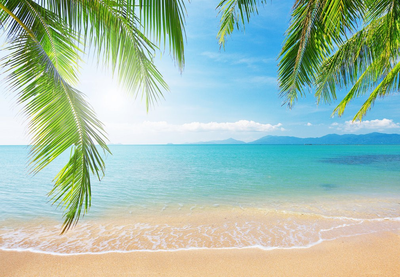

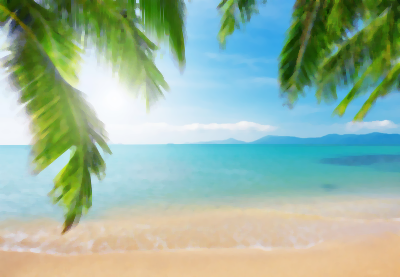

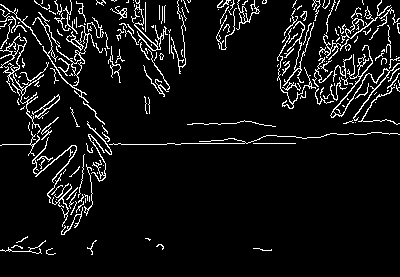

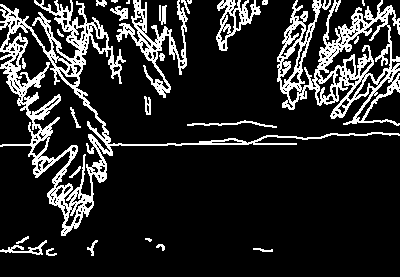

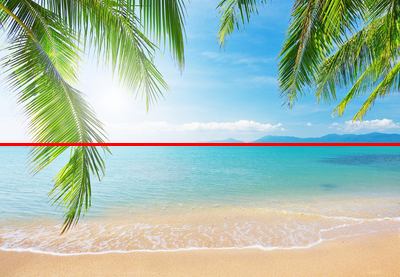

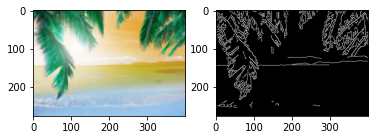

In [ ]:
#Author: Cem Tarhan
#Project: Horizon Line Detection

import cv2
import cv2 as cv
from scipy import misc
import numpy as np 
import matplotlib.pylab as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
import argparse
import math
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')
image = cv2.imread('/content/gdrive/My Drive/edge1.png')
#image = cv2.resize(image, (500, 300)) 
cv2_imshow(image)

kernel = np.ones((2,2),np.uint8)
erosion = cv.erode(image,kernel,iterations = 1)

median = cv.medianBlur(erosion,5)
cv2_imshow(median)

edges = cv.Canny(median,100,200)
plt.subplot(121),plt.imshow(median,cmap = 'gray')
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
cv2_imshow(edges)

dilation = cv.dilate(edges,kernel,iterations = 1)
cv2_imshow(dilation)

lines = cv.HoughLines(dilation,1,np.pi/180,200)

max_x1 = 0
max_y1 = 0

max_x2 = 0
max_y2 = 0

max_len = -300

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    x_diff = (x2 - x1)**2
    y_diff = (y2 - y1)**2
    len = math.sqrt(x_diff + y_diff)

    if len > max_len:
      max_len = len
      max_x1 = x1
      max_y1 = y1
      max_x2 = x2
      max_y2 = y2
      
cv.line(image,(x1,y1),(x2,y2),(0,0,255),2)
cv2_imshow(image)

In [ ]:
% autosave 1

Autosaving every 1 seconds
